In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/tmdb_enriched_movies.csv')

In [3]:
import pandas as pd

# Loading CSV
# df = pd.read_csv('tmdb_enriched_movies.csv')

# Cleaning column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Converting data types
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
num_cols = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Dropping rows with missing budget or revenue
df.dropna(subset=['budget', 'revenue'], inplace=True)

# Stripping and lowercasing text fields
text_cols = ['language', 'genres', 'production_companies', 'top_cast', 'keywords', 'status']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Splitting multi-value columns
df['genres_list'] = df['genres'].str.split(', ')
df['top_cast_list'] = df['top_cast'].str.split(', ')
df['keywords_list'] = df['keywords'].str.split(', ')

# Removing duplicate entries
df.drop_duplicates(subset=['movie_id', 'title'], inplace=True)

# Filtering out invalid rows
df = df[(df['budget'] >= 0) & (df['revenue'] >= 0) & (df['runtime'] > 0)]

# (TBD) Removing unwanted columns

# Previewing final dataset
df.head()


,movie_id,imdb_id,title,vote_average,vote_count,status,release_date,budget,revenue,popularity,runtime,language,genres,production_companies,director,top_cast,keywords,genres_list,top_cast_list,keywords_list
0,27205,tt1375666,Inception,8.369,37309,released,2010-07-15,160000000,839030630,26.3533,148,en,"action, science fiction, adventure","legendary pictures, syncopy, warner bros. pict...",Christopher Nolan,"leonardo dicaprio, joseph gordon-levitt, ken w...","rescue, mission, dreams, airplane, paris, fran...","[action, science fiction, adventure]","[leonardo dicaprio, joseph gordon-levitt, ken ...","[rescue, mission, dreams, airplane, paris, fra..."
1,157336,tt0816692,Interstellar,8.453,36903,released,2014-11-05,165000000,746606706,44.7344,169,en,"adventure, drama, science fiction","legendary pictures, syncopy, lynda obst produc...",Christopher Nolan,"matthew mcconaughey, anne hathaway, michael caine","rescue, future, spacecraft, race against time,...","[adventure, drama, science fiction]","[matthew mcconaughey, anne hathaway, michael c...","[rescue, future, spacecraft, race against time..."
2,155,tt0468569,The Dark Knight,8.519,33688,released,2008-07-16,185000000,1004558444,34.4859,152,en,"drama, action, crime, thriller","warner bros. pictures, legendary pictures, syn...",Christopher Nolan,"christian bale, heath ledger, aaron eckhart","joker, sadism, chaos, secret identity, crime f...","[drama, action, crime, thriller]","[christian bale, heath ledger, aaron eckhart]","[joker, sadism, chaos, secret identity, crime ..."
3,19995,tt0499549,Avatar,7.588,32126,released,2009-12-15,237000000,2923706026,32.3911,162,en,"action, adventure, fantasy, science fiction","dune entertainment, lightstorm entertainment, ...",James Cameron,"sam worthington, zoe saldaña, sigourney weaver","paraplegic, attachment to nature, culture clas...","[action, adventure, fantasy, science fiction]","[sam worthington, zoe saldaña, sigourney weaver]","[paraplegic, attachment to nature, culture cla..."
4,24428,tt0848228,The Avengers,7.735,31521,released,2012-04-25,220000000,1518815515,35.1429,143,en,"science fiction, action, adventure",marvel studios,Joss Whedon,"robert downey jr., chris evans, mark ruffalo","new york city, superhero, shield, based on com...","[science fiction, action, adventure]","[robert downey jr., chris evans, mark ruffalo]","[new york city, superhero, shield, based on co..."


In [4]:
# Saving the cleaned dataset to a new CSV file
df.to_csv('/content/drive/My Drive/cleaned_movies_dataset.csv', index=False)


In [9]:
# Run only once
!pip install numpy==1.23.5 --force-reinstall
!pip install catboost --force-reinstall

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is 

  Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached plotly-6.0.1-py3-none-any.whl.metadata (6.7 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.

0:	learn: 4.8015787	test: 4.6782472	best: 4.6782472 (0)	total: 12ms	remaining: 12s
100:	learn: 1.8010202	test: 1.8235617	best: 1.8235617 (100)	total: 1.81s	remaining: 16.2s
200:	learn: 1.7013769	test: 1.7971170	best: 1.7965629 (194)	total: 3.07s	remaining: 12.2s
300:	learn: 1.6287666	test: 1.7858895	best: 1.7857360 (298)	total: 3.94s	remaining: 9.16s
400:	learn: 1.5563383	test: 1.7816141	best: 1.7805817 (395)	total: 4.84s	remaining: 7.23s
500:	learn: 1.4998575	test: 1.7759978	best: 1.7753671 (484)	total: 5.72s	remaining: 5.7s
600:	learn: 1.4513001	test: 1.7708473	best: 1.7706777 (585)	total: 6.61s	remaining: 4.39s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1.767369623
bestIteration = 638

Shrink model to first 639 iterations.

📊 Validation Results:
MAE: 24,315,590.05
RMSE: 69,590,984.13
Custom ±10M Accuracy: 65.05%

📊 Test Results:
MAE: 24,084,697.05
RMSE: 64,767,335.86
Custom ±10M Accuracy: 64.94%


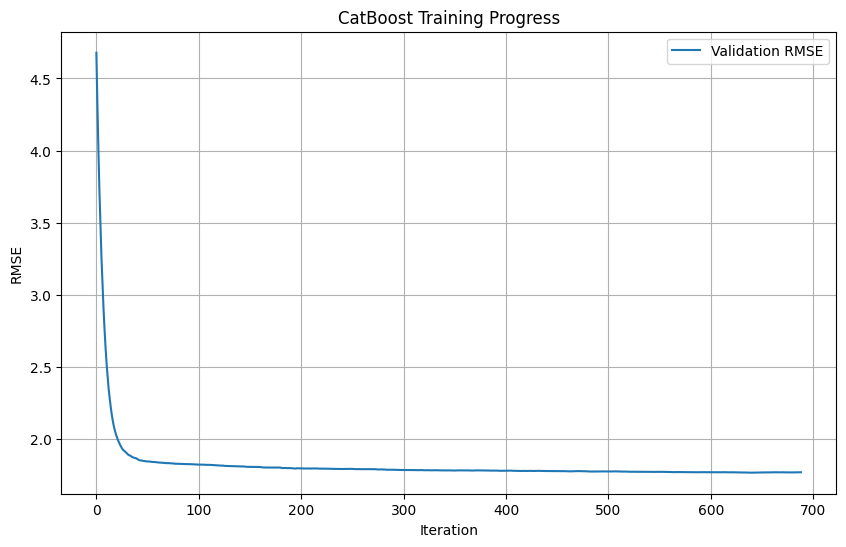

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt

# === 1. Loading cleaned dataset ===
df = pd.read_csv('/content/drive/My Drive/cleaned_movies_dataset.csv')

# === 2. Converting release_date to datetime format ===
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# === 3. Performing feature engineering ===
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['cast_count'] = df['top_cast'].fillna('').str.split(', ').apply(len)
df['genre_count'] = df['genres'].fillna('').str.split(', ').apply(len)
df['keyword_count'] = df['keywords'].fillna('').str.split(', ').apply(len)

# Extracting top 50 directors and assigning others as 'other'
top_directors = df['director'].value_counts().nlargest(50).index
df['director_clean'] = df['director'].apply(lambda x: x if x in top_directors else 'other')

# Extracting top 50 production companies and assigning others as 'other'
df['main_prod_company'] = df['production_companies'].str.split(', ').str[0]
top_companies = df['main_prod_company'].value_counts().nlargest(50).index
df['main_prod_company'] = df['main_prod_company'].apply(lambda x: x if x in top_companies else 'other')

# Applying log transformation to revenue (target)
df['log_revenue'] = np.log1p(df['revenue'])

# === 4. Defining feature and target columns ===
features = [
    'budget', 'runtime', 'vote_average', 'vote_count', 'popularity',
    'release_year', 'release_month', 'cast_count', 'genre_count', 'keyword_count',
    'language', 'status', 'main_prod_company', 'director_clean'
]
target = 'log_revenue'

X = df[features]
y = df[target]

# === 5. Splitting data into training, validation, and test sets ===
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.15, random_state=42)

# === 6. Listing categorical feature names ===
cat_features = ['language', 'status', 'main_prod_company', 'director_clean']

# === 7. Initializing and training CatBoost model ===
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    early_stopping_rounds=50,
    verbose=100
)

model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    cat_features=cat_features,
    use_best_model=True
)

# === 8. Defining evaluation function with custom ±10M accuracy ===
def evaluate(model, X, y_true, label):
    y_pred = model.predict(X)
    y_pred_rev = np.expm1(y_pred)
    y_true_rev = np.expm1(y_true)

    mae = mean_absolute_error(y_true_rev, y_pred_rev)
    rmse = np.sqrt(mean_squared_error(y_true_rev, y_pred_rev))
    within_range = np.abs(y_pred_rev - y_true_rev) <= 10000000  # ±10M
    custom_acc = np.mean(within_range)

    print(f"\n📊 {label} Results:")
    print(f"MAE: {mae:,.2f}")
    print(f"RMSE: {rmse:,.2f}")
    print(f"Custom ±10M Accuracy: {custom_acc * 100:.2f}%")

# === 9. Evaluating model on validation and test sets ===
evaluate(model, X_val, y_val, "Validation")
evaluate(model, X_test, y_test, "Test")

# === 10. Plotting CatBoost training progress ===
def plot_training_progress(model):
    evals = model.get_evals_result()
    rmse_vals = evals['validation']['RMSE']

    plt.figure(figsize=(10, 6))
    plt.plot(rmse_vals, label='Validation RMSE')
    plt.xlabel('Iteration')
    plt.ylabel('RMSE')
    plt.title('CatBoost Training Progress')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_progress(model)
